In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import pickle

In [648]:
import warnings
warnings.filterwarnings('ignore')

In [649]:
df = pd.read_csv('./data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [650]:
# df_test dataset has same features as df besides the "Loan_Status" feature.
# We will use it with df to get some values. 
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [652]:
# describes numeric data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [653]:
# describes categorical data
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002158,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [654]:
# Loan_ID is unique for each data point, so we can drop it
df.drop('Loan_ID', axis=1, inplace=True)
df_extended.drop('Loan_ID', axis=1, inplace=True)

In [655]:
# null or missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [656]:
# As we have some missing values, and our data is not a huge one,
# we will try to use df_test to get corresponding filling values (mode, mean and etc.) 
# or in other words we will use concatenated 2 dataframes where it is possible.

In [657]:
df_extended = pd.concat([df,df_test])
df_extended.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,NaN,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,NaN,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,NaN,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,NaN,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,NaN,Y,No,Urban,No


In [658]:
df_extended.corr()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.114247,0.023378,0.551811,-0.023089
CoapplicantIncome,-0.114247,1.000000,-0.027253,0.179228,-0.043860
Credit_History,0.023378,-0.027253,1.000000,-0.008235,-0.020439
LoanAmount,0.551811,0.179228,-0.008235,1.000000,0.055636
Loan_Amount_Term,-0.023089,-0.043860,-0.020439,0.055636,1.000000


### Filling missing data

#### Married

In [659]:
df_extended['Married'].value_counts().index[0]

'Yes'

In [660]:
df_extended['Married'].mode()[0]

'Yes'

In [661]:
df_extended['Married'].isnull().sum()

3

In [662]:
len(df['Married'])

614

In [663]:
notna_married = df[df['Married'].notna()]
len(notna_married)

611

In [664]:
marr_no = notna_married[notna_married['Married']=='No']['Loan_Status'].value_counts()
marr_yes = notna_married[notna_married['Married']=='Yes']['Loan_Status'].value_counts()
print(marr_no)
print(marr_yes)

Y    134
N     79
Name: Loan_Status, dtype: int64
Y    285
N    113
Name: Loan_Status, dtype: int64


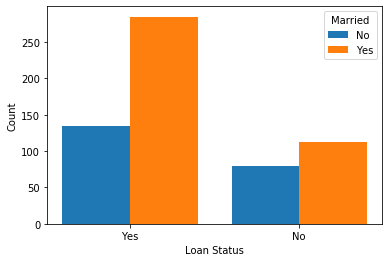

In [665]:
width = 0.4
labels = ['Yes', 'No']
x = np.arange(len(df['Loan_Status'].value_counts()))
plt.bar(x-0.2, marr_no, width=width, label='No')
plt.bar(x+0.2, marr_yes, width, label='Yes')
plt.legend(title="Married")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=labels)
plt.show()

In [666]:
# We can see that married applicants 'Loan Status' = 'Yes' proportion is higher than not married,
# so we decide to use weighted filling.

In [667]:
df['Married'].mode()[0]

'Yes'

In [668]:
count_yes, count_no = df['Married'].value_counts()
count_yes

398

In [669]:
weight_yes = np.round(count_yes/(count_yes+count_no),2)
weight_yes

0.65

In [670]:
np.random.choice(['Yes', 'No'], p=[weight_yes, 1-weight_yes])

'No'

In [671]:
df['Married']=df['Married'].fillna(np.random.choice(['Yes', 'No'], p=[weight_yes, 1-weight_yes]))
df['Married'].isnull().sum()

0

In [672]:
df['Married'].isnull().sum()

0

#### LoanAmount

In [673]:
df['LoanAmount'].isnull().sum()

22

In [674]:
loan_am_df_ext_notna_mask = pd.notna(df_extended['LoanAmount'])
loan_am = df_extended['LoanAmount']
loan_am_df_ext_notna = loan_am[loan_am_df_ext_notna_mask]
loan_am_df_ext_notna

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 954, dtype: float64

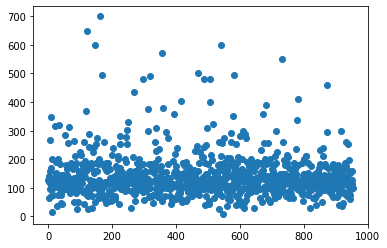

In [675]:
ind_loan_am_df_ext_notna = range(len(loan_am_df_ext_notna))
plt.scatter(ind_loan_am_df_ext_notna,loan_am_df_ext_notna)

In [676]:
# LoanAmount was affected by outliers, so to fill nan values we will use median instead of mean.

In [677]:
df_extended['LoanAmount'].mean()

142.51153039832286

In [678]:
df_extended['LoanAmount'].median()

126.0

In [679]:
df['LoanAmount'].median()

128.0

In [680]:
df['LoanAmount']=df['LoanAmount'].fillna(df_extended['LoanAmount'].median())
df['LoanAmount'].isnull().sum()

0

#### Self_Employed

In [681]:
df_extended['Self_Employed'].isnull().sum()

55

In [682]:
df['Self_Employed'].isnull().sum()

32

In [683]:
notna_self_emp = df[df['Self_Employed'].notna()]
print(df['Self_Employed'].value_counts())
len(notna_self_emp)

No     500
Yes     82
Name: Self_Employed, dtype: int64


582

In [684]:
self_emp_no = notna_self_emp[notna_self_emp['Self_Employed']=='No']['Loan_Status'].value_counts()
self_emp_yes = notna_self_emp[notna_self_emp['Self_Employed']=='Yes']['Loan_Status'].value_counts()
print(self_emp_no)
print(self_emp_yes)

Y    343
N    157
Name: Loan_Status, dtype: int64
Y    56
N    26
Name: Loan_Status, dtype: int64


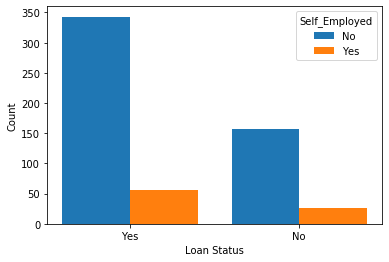

In [685]:
width = 0.4
labels = ['Yes', 'No']
x = np.arange(len(df['Loan_Status'].value_counts()))
plt.bar(x-0.2, self_emp_no, width=width, label='No')
plt.bar(x+0.2, self_emp_yes, width, label='Yes')
plt.legend(title="Self_Employed")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=labels)
plt.show()

In [686]:
self_emp_no

Y    343
N    157
Name: Loan_Status, dtype: int64

In [687]:
# percentage of 'Loan Status' == No in the group of applicants with 'Self_employed' == 'No'.
self_emp_no[1]/(self_emp_no[1]+self_emp_yes[1]) * 100

85.79234972677595

In [688]:
# percentage of 'Loan Status' == No in the group of applicants with 'Self_employed' == 'Yes'.
self_emp_no[0]/(self_emp_no[0]+self_emp_yes[0]) * 100

85.96491228070175

In [689]:
# As there is not obvious distinguish between 'Loan_Status' == 'Y' and 'N' proportions, we will fill it with the feature mode.

In [690]:
df_extended['Self_Employed'].mode()

0    No
dtype: object

In [691]:
df['Self_Employed']=df['Self_Employed'].fillna(df_extended['Self_Employed'].mode()[0])
df['Self_Employed'].isna().sum()

0

In [692]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [693]:
df_extended['Self_Employed'].mode()[0]

'No'

#### Loan_Amount_Term

In [694]:
df_extended['Loan_Amount_Term'].isnull().sum()

20

In [695]:
df['Loan_Amount_Term'].isnull().sum()

14

In [696]:
df_extended['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [697]:
df_extended['Loan_Amount_Term'].median()

360.0

In [698]:
# For a financial sector if a loan term is not defined (long term, short term) it treated as short term (<=360),
# so we will use that approach and will fill empty values with '360' or with the feature mode which is the same '360'.

In [699]:
type(df_extended['Loan_Amount_Term'].mode()[0])

numpy.float64

In [700]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df_extended['Loan_Amount_Term'].mode()[0])
df['Loan_Amount_Term'].isna().sum()

0

#### Credit_History        

In [701]:
df["Credit_History"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [702]:
df['Credit_History'].astype('float')

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [703]:
df_extended['Credit_History'].isnull().sum()

79

In [704]:
df['Credit_History'].isnull().sum()

50

In [705]:
notna_cred_hist = df[df['Credit_History'].notna()]
print(df['Credit_History'].value_counts())
len(notna_cred_hist)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


564

In [706]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [707]:
df_extended['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [708]:
cred_hist_no = notna_cred_hist[notna_cred_hist['Credit_History']==0]['Loan_Status'].value_counts()
cred_hist_yes = notna_cred_hist[notna_cred_hist['Credit_History']==1]['Loan_Status'].value_counts()
print(cred_hist_no[::-1])
print(cred_hist_yes)
cred_hist_no = cred_hist_no[::-1]
print(cred_hist_no)

Y     7
N    82
Name: Loan_Status, dtype: int64
Y    378
N     97
Name: Loan_Status, dtype: int64
Y     7
N    82
Name: Loan_Status, dtype: int64


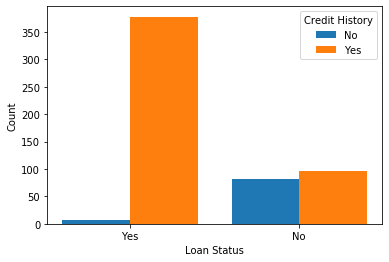

In [709]:
width = 0.4
labels = ['Yes', 'No']
x = np.arange(len(df['Loan_Status'].value_counts()))
plt.bar(x-0.2, cred_hist_no, width=width, label='No')
plt.bar(x+0.2, cred_hist_yes, width, label='Yes')
plt.legend(title="Credit History")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=labels)
plt.show()

In [710]:
# percentage of 'Loan Status' == No in the group of applicants that have not 'Credit History'.
cred_hist_no[1]/(cred_hist_no[1]+cred_hist_yes[1]) * 100

45.81005586592179

In [711]:
# percentage of 'Loan Status' == No in the group of applicants that have 'Credit History'.
cred_hist_no[0]/(cred_hist_no[0]+cred_hist_yes[0]) * 100

1.8181818181818181

In [712]:
# As plot shows applicants that have not a 'Credit History' have approximately equal chances to receive a loan
# But the situation is different when applicant has 'Credit History'.

In [713]:
df.loc[(df['Credit_History'].isna()) & (df['Loan_Status'] == 'Y')].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y


In [714]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [715]:
# If 'Loan_Status' == 'Y' --> 'Credit_History' = 1
df.loc[(df['Credit_History'].isna()) & (df['Loan_Status'] == 'Y'),'Credit_History'] = 1.0

In [716]:
df['Credit_History'].value_counts()

1.0    512
0.0     89
Name: Credit_History, dtype: int64

In [717]:
df['Credit_History'].isna().sum()

13

In [718]:
weight_no = np.round(cred_hist_no[1]/(cred_hist_no[1]+cred_hist_yes[1]),2)
weight_no

0.46

In [719]:
# If 'Loan_Status' == 'N' --> 'Credit_History' will be filled by randomly choozen values "Y" and "N"
# with appropriate probabilities.
df.loc[(df['Credit_History'].isna()) & (df['Loan_Status'] == 'N'),'Credit_History'] = np.random.choice(
    [1.0, 0.0], p=[1-weight_no, weight_no]
)

In [720]:
df['Credit_History'].isna().sum()

0

In [721]:
df['Credit_History'].dtype

dtype('float64')

In [722]:
df['Credit_History'].value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

#### Gender

In [723]:
df_extended['Gender'].isnull().sum()

24

In [724]:
df['Gender'].isnull().sum()

13

In [725]:
notna_gender = df[df['Gender'].notna()]
print(df['Gender'].value_counts())
len(notna_gender)

Male      489
Female    112
Name: Gender, dtype: int64


601

In [726]:
gender_male = notna_gender[notna_gender['Gender']=='Male']['Loan_Status'].value_counts()
gender_female = notna_gender[notna_gender['Gender']=='Female']['Loan_Status'].value_counts()
print(gender_male)
print(gender_female)

Y    339
N    150
Name: Loan_Status, dtype: int64
Y    75
N    37
Name: Loan_Status, dtype: int64


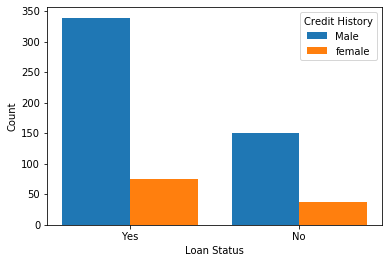

In [727]:
width = 0.4
labels = ['Yes', 'No']
x = np.arange(len(df['Loan_Status'].value_counts()))
plt.bar(x-0.2, gender_male, width=width, label='Male')
plt.bar(x+0.2, gender_female, width, label='female')
plt.legend(title="Credit History")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=labels)
plt.show()

In [728]:
# percentage of 'Loan Status' == No in the group of applicants with 'Gender' == 'Male'.
gender_male[0]/(gender_male[0]+gender_female[0]) * 100

81.88405797101449

In [729]:
# percentage of 'Loan Status' == No in the group of applicants with 'Gender' == 'Female'.
gender_male[1]/(gender_male[1]+gender_female[1]) * 100

80.21390374331551

In [730]:
# As plot shows applicants with 'Gender' == Male and 'Gender' == Female have approximately equal chances to receive a loan.
# But the proportion of applicants 'Male' and 'Female' is very different.
# So to keep this proportion, we will fill missing values using random choice with a computed weights for each subgroup.

In [731]:
# weight_0 ---> weight of 'Male'
weight_0 = np.round(df['Gender'].value_counts()[0] / len(notna_gender), 2)
print(weight_0)
# weight_1 ---> weight of 'Female'
weight_1 = 1 - weight_0

0.81


In [732]:
df['Gender']=df['Gender'].fillna(str(np.random.choice(['Male', 'Female'], p=[weight_0, weight_1])))
df['Gender'].isna().sum()

0

#### Dependents

In [733]:
df_extended['Dependents'].isnull().sum()

25

In [734]:
df['Dependents'].isnull().sum()

15

In [735]:
notna_dependents = df[df['Dependents'].notna()]
print(df['Dependents'].value_counts())
len(notna_dependents)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


599

In [736]:
depend_0 = notna_dependents[notna_dependents['Dependents']=='0']['Loan_Status'].value_counts()
depend_1 = notna_dependents[notna_dependents['Dependents']=='1']['Loan_Status'].value_counts()
depend_2 = notna_dependents[notna_dependents['Dependents']=='2']['Loan_Status'].value_counts()
depend_3 = notna_dependents[notna_dependents['Dependents']=='3+']['Loan_Status'].value_counts()
print(depend_0)
print(depend_1)
print(depend_2)
print(depend_3)

Y    238
N    107
Name: Loan_Status, dtype: int64
Y    66
N    36
Name: Loan_Status, dtype: int64
Y    76
N    25
Name: Loan_Status, dtype: int64
Y    33
N    18
Name: Loan_Status, dtype: int64


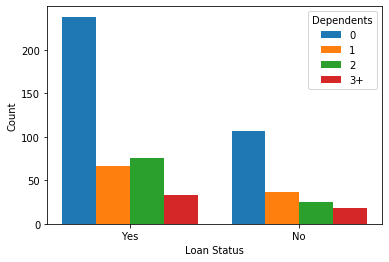

In [737]:
width = 0.2
labels = ['Yes', 'No']
x = np.arange(len(df['Loan_Status'].value_counts()))
plt.bar(x-0.3, depend_0, width=width, label='0')
plt.bar(x-0.1, depend_1, width, label='1')
plt.bar(x+0.1, depend_2, width, label='2')
plt.bar(x+0.3, depend_3, width, label='3+')
plt.legend(title="Dependents")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=labels)
plt.show()

In [738]:
df_extended['Dependents'].isna().sum()

25

In [739]:
# For this group as default value or value for filling missing data we will use mode of this feature.
df['Dependents']=df['Dependents'].fillna(df_extended['Dependents'].mode()[0])
df['Dependents'].isna().sum()

0

In [740]:
# Fianly we fill all missing values 

In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [742]:
df['Loan_Status'] = df['Loan_Status'].map({'N' : 0, 'Y': 1})
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [743]:
df_filled = df.copy()
df_filled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Creation of new features

In [744]:
df_filled.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565076,-0.046531,-0.010051,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189350,-0.059383,-0.054737,-0.059187
LoanAmount,0.565076,0.189350,1.000000,0.037009,-0.022155,-0.032864
Loan_Amount_Term,-0.046531,-0.059383,0.037009,1.000000,-0.007758,-0.022549
Credit_History,-0.010051,-0.054737,-0.022155,-0.007758,1.000000,0.595642
Loan_Status,-0.004710,-0.059187,-0.032864,-0.022549,0.595642,1.000000


In [745]:
corr = df_filled.corr()
corr.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1,-0.116605,0.565076,-0.0465311,-0.0100508,-0.00470952
CoapplicantIncome,-0.116605,1,0.18935,-0.0593831,-0.0547368,-0.0591873
LoanAmount,0.565076,0.18935,1,0.0370092,-0.0221546,-0.0328635
Loan_Amount_Term,-0.0465311,-0.0593831,0.0370092,1,-0.00775828,-0.022549
Credit_History,-0.0100508,-0.0547368,-0.0221546,-0.00775828,1,0.595642
Loan_Status,-0.00470952,-0.0591873,-0.0328635,-0.022549,0.595642,1


In [746]:
# There are some relationships between features, for example, in financial retrospective
# a loan amount and a loan amount term has some strong relationship as well as CoapplicantIncome and applicant income.
# We will create new features such as 'new_col_1'(LoanAmount & Loan_Amount_Term)
# and 'new_col_2'('CoapplicantIncome & ApplicantIncome') respectively.

In [747]:
# new features
df_filled['new_col_1'] = 1/(df_filled['LoanAmount'] / df_filled['Loan_Amount_Term'])
df_filled['new_col_2'] = (df_filled['ApplicantIncome'] + df_filled['CoapplicantIncome'])

In [748]:
df_filled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,new_col_1,new_col_2
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1,2.857143,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,2.812500,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,5.454545,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,3.000000,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,2.553191,6000.0


In [749]:
df_filled.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,new_col_1,new_col_2
ApplicantIncome,1.000000,-0.116605,0.565076,-0.046531,-0.010051,-0.004710,-0.216258,0.893037
CoapplicantIncome,-0.116605,1.000000,0.189350,-0.059383,-0.054737,-0.059187,-0.144511,0.342781
LoanAmount,0.565076,0.189350,1.000000,0.037009,-0.022155,-0.032864,-0.517662,0.620277
Loan_Amount_Term,-0.046531,-0.059383,0.037009,1.000000,-0.007758,-0.022549,0.210502,-0.070917
Credit_History,-0.010051,-0.054737,-0.022155,-0.007758,1.000000,0.595642,0.045459,-0.034306
Loan_Status,-0.004710,-0.059187,-0.032864,-0.022549,0.595642,1.000000,-0.009376,-0.031271
new_col_1,-0.216258,-0.144511,-0.517662,0.210502,0.045459,-0.009376,1.000000,-0.270026
new_col_2,0.893037,0.342781,0.620277,-0.070917,-0.034306,-0.031271,-0.270026,1.000000


In [750]:
corr = df_filled.corr()
corr.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,new_col_1,new_col_2
ApplicantIncome,1,-0.116605,0.565076,-0.0465311,-0.0100508,-0.00470952,-0.216258,0.893037
CoapplicantIncome,-0.116605,1,0.18935,-0.0593831,-0.0547368,-0.0591873,-0.144511,0.342781
LoanAmount,0.565076,0.18935,1,0.0370092,-0.0221546,-0.0328635,-0.517662,0.620277
Loan_Amount_Term,-0.0465311,-0.0593831,0.0370092,1,-0.00775828,-0.022549,0.210502,-0.0709172
Credit_History,-0.0100508,-0.0547368,-0.0221546,-0.00775828,1,0.595642,0.0454587,-0.0343065
Loan_Status,-0.00470952,-0.0591873,-0.0328635,-0.022549,0.595642,1,-0.00937628,-0.0312708
new_col_1,-0.216258,-0.144511,-0.517662,0.210502,0.0454587,-0.00937628,1,-0.270026
new_col_2,0.893037,0.342781,0.620277,-0.0709172,-0.0343065,-0.0312708,-0.270026,1


### Format Data Part 1: Split data into Dependent and Independent Variables

In [751]:
# Dependent variable is y
y = df_filled['Loan_Status'].copy()
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [752]:
# Independent variable is X
X = df_filled.drop(['Loan_Status'], axis='columns').copy()
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,new_col_1,new_col_2
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,2.857143,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,2.812500,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,5.454545,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,3.000000,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,2.553191,6000.0


### Format the Data Part 2: One-Hot-Encoding

In [753]:
X.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
new_col_1            float64
new_col_2            float64
dtype: object

In [754]:
X_encoded = pd.get_dummies(X, columns=['Credit_History',
                                       'Dependents',
                                       'Education',
                                       'Gender',
                                       'Married',
                                       'Property_Area',
                                       'Self_Employed',
                                       ])
X_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,new_col_1,new_col_2,Credit_History_0.0,Credit_History_1.0,Dependents_0,Dependents_1,...,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,126.0,360.0,2.857143,5849.0,0,1,1,0,...,0,0,1,1,0,0,0,1,1,0
1,4583,1508.0,128.0,360.0,2.812500,6091.0,0,1,0,1,...,0,0,1,0,1,1,0,0,1,0
2,3000,0.0,66.0,360.0,5.454545,3000.0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,3.000000,4941.0,0,1,1,0,...,1,0,1,0,1,0,0,1,1,0
4,6000,0.0,141.0,360.0,2.553191,6000.0,0,1,1,0,...,0,0,1,1,0,0,0,1,1,0


In [755]:
X_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'new_col_1', 'new_col_2', 'Credit_History_0.0',
       'Credit_History_1.0', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

###  Centring and Scaling

In [756]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [757]:
# As we will use some models that require scaled values, we need to make some transformations such as StandardScaler.
# To avoid data 'Data Leakage' we will scale train and test data separately.
# For train data we will use fit_transform() 
# For test data we will use transform()

In [758]:
scaler_app_inc = StandardScaler()
scaler_coapp_inc = StandardScaler()
scaler_loan_am = StandardScaler()
scaler_loan_am_term = StandardScaler()

scaler_new_col_1 = StandardScaler()
scaler_new_col_2 = StandardScaler()

In [759]:
X_train['ApplicantIncome'] = scaler_app_inc.fit_transform(X_train[['ApplicantIncome']])
X_train['CoapplicantIncome'] = scaler_coapp_inc.fit_transform(X_train[['CoapplicantIncome']])
X_train['LoanAmount'] = scaler_loan_am.fit_transform(X_train[['LoanAmount']])
X_train['Loan_Amount_Term'] = scaler_loan_am_term.fit_transform(X_train[['Loan_Amount_Term']])

X_train['new_col_1'] = scaler_new_col_1.fit_transform(X_train[['new_col_1']])
X_train['new_col_2'] = scaler_new_col_2.fit_transform(X_train[['new_col_2']])

In [760]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,new_col_1,new_col_2,Credit_History_0.0,Credit_History_1.0,Dependents_0,Dependents_1,...,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
83,0.083915,0.180667,1.356240,0.287611,-0.944752,0.167302,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
90,-0.429338,0.385430,-0.196817,0.287611,-0.101399,-0.206402,0,1,1,0,...,0,0,1,0,1,0,1,0,1,0
227,0.126095,0.005831,0.718791,0.287611,-0.728819,0.119652,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
482,-0.576970,0.464185,-0.231587,0.287611,-0.062309,-0.304046,0,1,1,0,...,0,0,1,0,1,0,1,0,1,0
464,-0.225522,-0.528127,-0.579286,0.287611,0.460216,-0.470744,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0


In [761]:
X_test['ApplicantIncome'] = scaler_app_inc.transform(X_test[['ApplicantIncome']])
X_test['CoapplicantIncome'] = scaler_coapp_inc.transform(X_test[['CoapplicantIncome']])
X_test['LoanAmount'] = scaler_loan_am.transform(X_test[['LoanAmount']])
X_test['Loan_Amount_Term'] = scaler_loan_am_term.transform(X_test[['Loan_Amount_Term']])

X_test['new_col_1'] = scaler_new_col_1.transform(X_test[['new_col_1']])
X_test['new_col_2'] = scaler_new_col_2.transform(X_test[['new_col_2']])

#### We will collect our models statistics for comparisone and chossing the best model. 

In [762]:
# After training each model will add his (model) name, train and test accuracy scores,
# optimal model name and the optimal model itself.

In [763]:
models_statistics = pd.DataFrame(columns=['model_name', 'train_score', 'test_score','optimal_model_name','optimal_model'])
models_statistics

,model_name,train_score,test_score,optimal_model_name,optimal_model


### Logistic Regresssion

In [764]:
# Preliminary model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [765]:
y_pred = pd.DataFrame(lr.predict(X_test))
lr.score(X_train, y_train)

0.835030549898167

In [766]:
lr.score(X_test, y_test)

0.8292682926829268

In [767]:
y_pred_LR = lr.predict(X_test)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_LR, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.53      0.69        43
         Yes       0.80      0.99      0.88        80

    accuracy                           0.83       123
   macro avg       0.88      0.76      0.78       123
weighted avg       0.85      0.83      0.81       123



In [768]:
# Hyperparameters tuning with GridSearch

In [769]:
param_grid = [
    {'penalty': ['l1', 'l2'],
     'C':[0.001,0.01,0.1,0.5,0.7,1,5],
    'class_weight':[None,'balanced'],
    'random_state': np.array([42])
    }
]

In [770]:
optimal_params = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0 # Note: If you want to see what Grid Search is doing, set verbose=2
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'random_state': 42}


In [771]:
C = optimal_params.best_params_['C']
penalty = optimal_params.best_params_['penalty']
class_weight = optimal_params.best_params_['class_weight']
random_state = optimal_params.best_params_['random_state']

lr_optimal = LogisticRegression(
    C=C,
    penalty=penalty,
    class_weight=class_weight,
    random_state=random_state
)
lr_optimal.fit(X_train, y_train)

print(lr_optimal.score(X_train, y_train))
print(lr_optimal.score(X_test, y_test))

0.835030549898167
0.8211382113821138


In [772]:
y_pred_LR = lr.predict(X_test)
target_names = ['No','Yes']
print(classification_report(y_test, y_pred_LR, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.53      0.69        43
         Yes       0.80      0.99      0.88        80

    accuracy                           0.83       123
   macro avg       0.88      0.76      0.78       123
weighted avg       0.85      0.83      0.81       123



#### Feature Importance

Text(0.5, 1.0, 'Feature Importance - Logistic Regression')

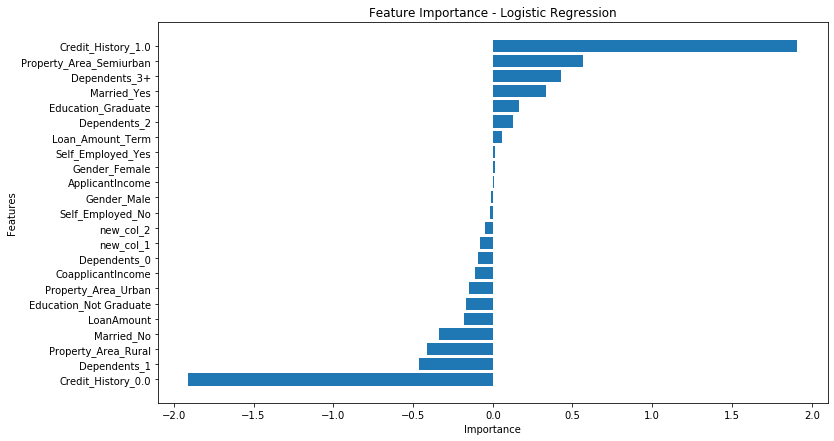

In [773]:
importance_lr = lr.coef_[0]
feat_imp_df = pd.DataFrame({'Feature_names':X_encoded.columns, 'importance':importance_lr })
feat_imp_df_sorted = feat_imp_df.sort_values(by=['importance'])
plt.figure(figsize=(12,7))
plt.barh(feat_imp_df_sorted['Feature_names'],feat_imp_df_sorted['importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('Feature Importance - Logistic Regression')

In [774]:
a_series = pd.Series({'model_name':'Logistic Regression',
                      'train_score':lr_optimal.score(X_train, y_train),
                      'test_score':lr_optimal.score(X_test, y_test),
                      'optimal_model_name':'lr_optimal',
                     'optimal_model': lr_optimal})
models_statistics = models_statistics.append(a_series, ignore_index=True)
models_statistics

,model_name,train_score,test_score,optimal_model_name,optimal_model
0,Logistic Regression,0.835031,0.821138,lr_optimal,"LogisticRegression(C=0.1, random_state=42)"


### SVM

In [775]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

SVC(random_state=42)

In [776]:
clf_svm.score(X_train, y_train)

0.8472505091649695

In [777]:
clf_svm.score(X_test, y_test)

0.8211382113821138

In [778]:
y_pred_SVM = clf_svm.predict(X_test)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_SVM, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.51      0.67        43
         Yes       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123



In [779]:
param_grid = [
    {"C":[0.1,0.3,0.5,0.8,1,5,7,10], # Note: Values for C must be > 0
     'gamma':['scale', 1, 0.1, 0.5, 0.01,0.03,0.05,0.07,0.08,0.09, 0.001, 0.005],
     'kernel':['rbf','linear'],
    'class_weight':[None,'balanced'],
     'random_state': np.array([42])
    },
]


optimal_params = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0 # Note: If you want to see what Grid Search is doing, set verbose=2
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 42}


In [780]:
C = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
class_weight = optimal_params.best_params_['class_weight']
kernel = optimal_params.best_params_['kernel']
random_state = optimal_params.best_params_['random_state']

clf_svm_optimal = SVC(
    C=C,
    gamma=gamma,
    class_weight=class_weight,
    random_state=random_state,
    kernel=kernel
)
clf_svm_optimal.fit(X_train, y_train)

print(clf_svm_optimal.score(X_train, y_train))
print(clf_svm_optimal.score(X_test, y_test))

0.8329938900203666
0.8211382113821138


In [781]:
y_pred_SVM = clf_svm.predict(X_test)
target_names = ['No','Yes']
print(classification_report(y_test, y_pred_SVM, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.51      0.67        43
         Yes       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123



In [782]:
clf_svm_optimal.coef_[0]

array([-2.10718689e-06, -2.30430181e-05, -8.25018684e-05, -5.60888637e-06,
       -6.48611157e-05, -1.33791162e-05, -1.00004014e+00,  1.00004014e+00,
       -1.28075755e-05,  1.62222953e-05,  7.51391234e-06, -1.09286321e-05,
        2.73393436e-05, -2.73393436e-05,  2.03086705e-05, -2.03086705e-05,
       -4.58436778e-05,  4.58436778e-05, -6.17728839e-05,  3.01127528e-05,
        3.16601311e-05,  7.70338356e-06, -7.70338355e-06])

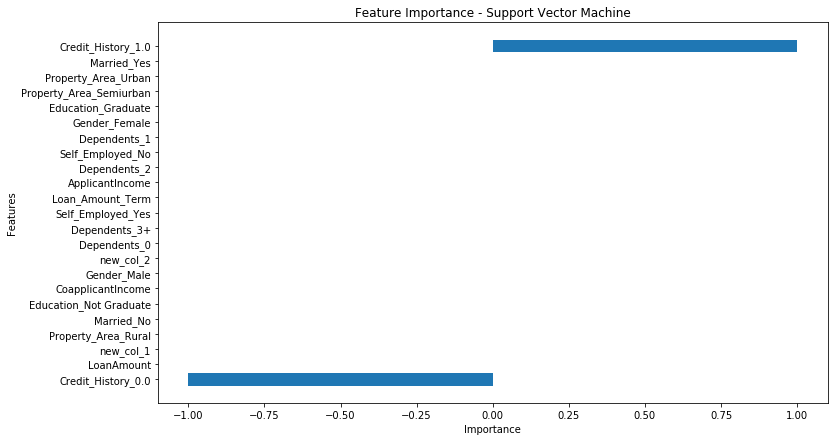

In [783]:
if kernel == 'linear':
    importance_svm = clf_svm_optimal.coef_[0]
    feat_imp_df = pd.DataFrame({'Feature_names':X_encoded.columns, 'importance':importance_svm })
    feat_imp_df_sorted = feat_imp_df.sort_values(by=['importance'])
    #print(feat_imp_df_sorted)
    plt.figure(figsize=(12,7))
    plt.barh(feat_imp_df_sorted['Feature_names'],feat_imp_df_sorted['importance'])
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title('Feature Importance - Support Vector Machine')

In [784]:
a_series = pd.Series({'model_name':'Support Vector Machine',
                      'train_score':clf_svm_optimal.score(X_train, y_train),
                      'test_score':clf_svm_optimal.score(X_test, y_test),
                      'optimal_model_name':'clf_svm_optimal',
                     'optimal_model': clf_svm_optimal})
models_statistics = models_statistics.append(a_series, ignore_index=True)
models_statistics

,model_name,train_score,test_score,optimal_model_name,optimal_model
0,Logistic Regression,0.835031,0.821138,lr_optimal,"LogisticRegression(C=0.1, random_state=42)"
1,Support Vector Machine,0.832994,0.821138,clf_svm_optimal,"SVC(C=0.1, kernel='linear', random_state=42)"


### DecisionTree

In [785]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [786]:
clf_dt.score(X_train, y_train)

1.0

In [787]:
clf_dt.score(X_test, y_test)

0.7560975609756098

In [788]:
y_pred_DT = clf_dt.predict(X_test)
target_names = ['No','Yes']
print(classification_report(y_test, y_pred_DT, target_names=target_names))

              precision    recall  f1-score   support

          No       0.65      0.65      0.65        43
         Yes       0.81      0.81      0.81        80

    accuracy                           0.76       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.76      0.76      0.76       123



In [789]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':range(1,5),
             'min_samples_split':range(1,5),
             'min_samples_leaf':range(1,5),
              'ccp_alpha':np.array([1,0.1,0.01,0.001,0.0001,0]),
              'class_weight':[None,'balanced'],
              'random_state': np.array([42])
             }

In [790]:
optimal_params = GridSearchCV(
        clf_dt,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0 # Note: If you want to see what Grid Search is doing, set verbose=2
    )

In [791]:
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [792]:
ccp_alpha = optimal_params.best_params_['ccp_alpha']
class_weight = optimal_params.best_params_['class_weight']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
min_samples_leaf = optimal_params.best_params_['min_samples_leaf']
min_samples_split = optimal_params.best_params_['min_samples_split']
random_state = optimal_params.best_params_['random_state']

In [793]:
clf_dt_pruned = DecisionTreeClassifier(random_state=random_state,
                                       ccp_alpha= ccp_alpha,
                                      class_weight=class_weight,
                                      criterion=criterion,
                                      max_depth=max_depth,
                                      min_samples_leaf=min_samples_leaf,
                                      min_samples_split=min_samples_split)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

In [794]:
features = X_encoded.columns.values
features

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'new_col_1', 'new_col_2', 'Credit_History_0.0',
       'Credit_History_1.0', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Self_Employed_No', 'Self_Employed_Yes'], dtype=object)

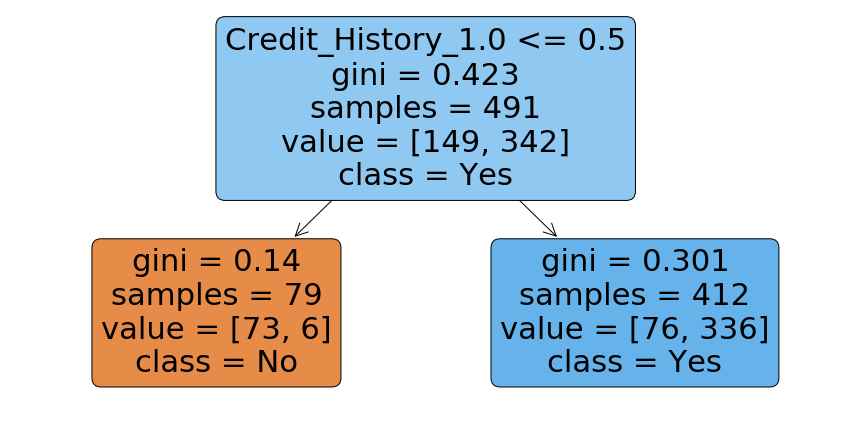

In [795]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=['No', 'Yes'], 
         feature_names=features);

In [796]:
clf_dt_pruned.score(X_train, y_train)

0.8329938900203666

In [797]:
clf_dt_pruned.score(X_test, y_test)

0.8211382113821138

In [798]:
y_pred_DT = clf_dt_pruned.predict(X_test)
target_names = ['No','Yes']
print(classification_report(y_test, y_pred_DT, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.51      0.67        43
         Yes       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123



Text(0.5, 1.0, 'Feature Importance - Random Forest Classifier')

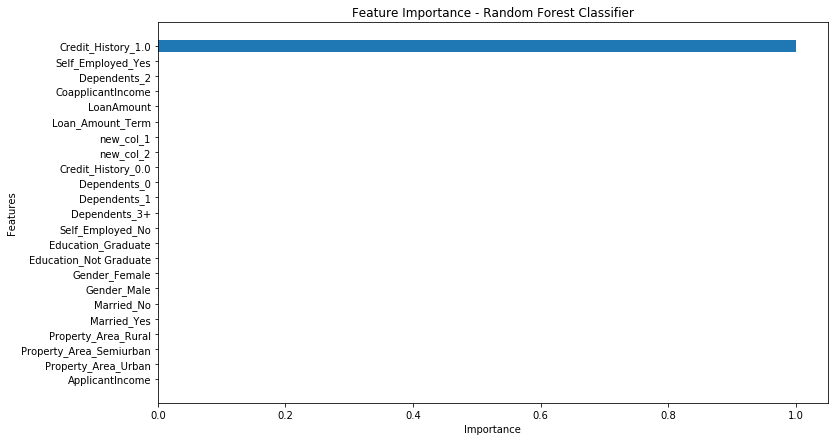

In [799]:
importance_rand_for = clf_dt_pruned.feature_importances_
#print(clf_dt_pruned.feature_importances_)
feat_imp_df = pd.DataFrame({'Feature_names':X_encoded.columns, 'importance':importance_rand_for })
feat_imp_df_sorted = feat_imp_df.sort_values(by=['importance'])
plt.figure(figsize=(12,7))
plt.barh(feat_imp_df_sorted['Feature_names'],feat_imp_df_sorted['importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('Feature Importance - Random Forest Classifier')

In [800]:
a_series = pd.Series({'model_name':'Decision Tree',
                      'train_score':clf_dt_pruned.score(X_train, y_train),
                      'test_score':clf_dt_pruned.score(X_test, y_test),
                      'optimal_model_name':'clf_dt_pruned',
                     'optimal_model': clf_dt_pruned})
models_statistics = models_statistics.append(a_series, ignore_index=True)
models_statistics

,model_name,train_score,test_score,optimal_model_name,optimal_model
0,Logistic Regression,0.835031,0.821138,lr_optimal,"LogisticRegression(C=0.1, random_state=42)"
1,Support Vector Machine,0.832994,0.821138,clf_svm_optimal,"SVC(C=0.1, kernel='linear', random_state=42)"
2,Decision Tree,0.832994,0.821138,clf_dt_pruned,"DecisionTreeClassifier(ccp_alpha=0.1, max_dept..."


### Random Forest

In [801]:
random_for = RandomForestClassifier(random_state=42)
random_for = random_for.fit(X_train, y_train)

In [802]:
random_for.score(X_train, y_train)

1.0

In [803]:
random_for.score(X_test, y_test)

0.8048780487804879

In [804]:
y_pred_Rand_For = random_for.predict(X_test)
target_names = ['No','Yes']
print(classification_report(y_test, y_pred_Rand_For, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.51      0.65        43
         Yes       0.79      0.96      0.87        80

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.80      0.79       123



In [805]:
param_grid = {'bootstrap': [True,False],
                 'class_weight': [None,'balanced'],
                 'criterion': ['gini','entropy'],
                 'max_depth': range(1,2),
                 'max_features': ['auto', 'sqrt'],
                 #'max_leaf_nodes': range(1,2),
                 #'min_impurity_decrease': 0.0,
                 #'min_impurity_split': None,
                 #'min_samples_leaf': range(1,2),
                 #'min_samples_split': range(1,2),
                 #'min_weight_fraction_leaf': 0.0,
                 'n_estimators': range(1,40,3),
                 'n_jobs': np.array([-1]),
                 'oob_score': [True,False],
                 'random_state': np.array([42]),
                }

In [806]:
optimal_params = GridSearchCV(
        random_for,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0 # Note: If you want to see what Grid Search is doing, set verbose=2
    )

In [807]:
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 22, 'n_jobs': -1, 'oob_score': False, 'random_state': 42}


In [808]:
bootstrap = optimal_params.best_params_['bootstrap']
class_weight = optimal_params.best_params_['class_weight']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
max_features = optimal_params.best_params_['max_features']
n_estimators = optimal_params.best_params_['n_estimators']
random_state = optimal_params.best_params_['random_state']
n_jobs = optimal_params.best_params_['n_jobs']
oob_score = optimal_params.best_params_['oob_score']

In [809]:
random_for_optimal = RandomForestClassifier(bootstrap=bootstrap,
                                    class_weight= class_weight,
                                    criterion=criterion,
                                    max_depth=max_depth,
                                    max_features=max_features,
                                    n_estimators=n_estimators,
                                    random_state=random_state,
                                    n_jobs=n_jobs,
                                    oob_score=oob_score
                                    )
random_for_optimal = random_for_optimal.fit(X_train, y_train)

In [810]:
random_for_optimal.score(X_train, y_train)

0.8431771894093686

In [811]:
random_for_optimal.score(X_test, y_test)

0.8048780487804879

In [812]:
y_pred_Rand_For = random_for.predict(X_test)
target_names = ['No','Yes']
print(classification_report(y_test, y_pred_Rand_For, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.51      0.65        43
         Yes       0.79      0.96      0.87        80

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.80      0.79       123



Text(0.5, 1.0, 'Feature Importance - Random Forest Classifier')

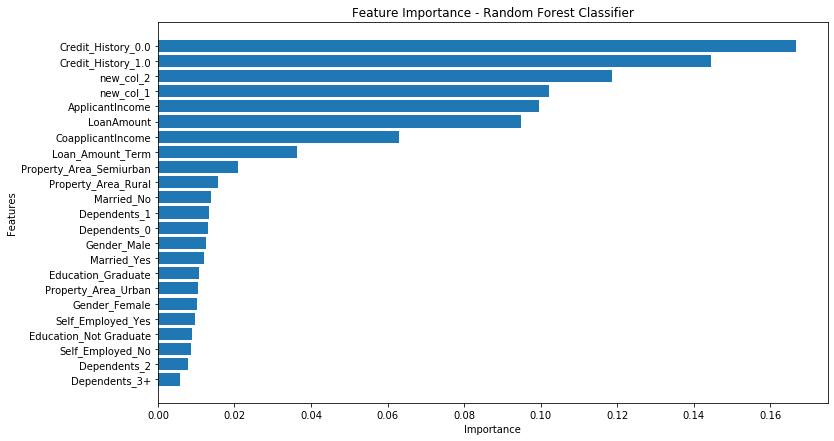

In [813]:
importance_rand_for = random_for.feature_importances_
feat_imp_df = pd.DataFrame({'Feature_names':X_encoded.columns, 'importance':importance_rand_for })
feat_imp_df_sorted = feat_imp_df.sort_values(by=['importance'])
plt.figure(figsize=(12,7))
plt.barh(feat_imp_df_sorted['Feature_names'],feat_imp_df_sorted['importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title('Feature Importance - Random Forest Classifier')

In [814]:
a_series = pd.Series({'model_name':'Random Forest',
                      'train_score':random_for_optimal.score(X_train, y_train),
                      'test_score':random_for_optimal.score(X_test, y_test),
                      'optimal_model_name':'random_for_optimal',
                     'optimal_model': random_for_optimal})
models_statistics = models_statistics.append(a_series, ignore_index=True)
models_statistics

,model_name,train_score,test_score,optimal_model_name,optimal_model
0,Logistic Regression,0.835031,0.821138,lr_optimal,"LogisticRegression(C=0.1, random_state=42)"
1,Support Vector Machine,0.832994,0.821138,clf_svm_optimal,"SVC(C=0.1, kernel='linear', random_state=42)"
2,Decision Tree,0.832994,0.821138,clf_dt_pruned,"DecisionTreeClassifier(ccp_alpha=0.1, max_dept..."
3,Random Forest,0.843177,0.804878,random_for_optimal,"(DecisionTreeClassifier(criterion='entropy', m..."


### Final statistics

In [815]:
models_statistics.sort_values(by=['test_score', 'train_score'], ascending=False)

,model_name,train_score,test_score,optimal_model_name,optimal_model
0,Logistic Regression,0.835031,0.821138,lr_optimal,"LogisticRegression(C=0.1, random_state=42)"
1,Support Vector Machine,0.832994,0.821138,clf_svm_optimal,"SVC(C=0.1, kernel='linear', random_state=42)"
2,Decision Tree,0.832994,0.821138,clf_dt_pruned,"DecisionTreeClassifier(ccp_alpha=0.1, max_dept..."
3,Random Forest,0.843177,0.804878,random_for_optimal,"(DecisionTreeClassifier(criterion='entropy', m..."


### Best model

In [816]:
models_statistics.sort_values(by=['test_score', 'train_score'], ascending=False).loc[0,:]

model_name                                   Logistic Regression
train_score                                             0.835031
test_score                                              0.821138
optimal_model_name                                    lr_optimal
optimal_model         LogisticRegression(C=0.1, random_state=42)
Name: 0, dtype: object

### Serializing models

In [817]:
with open("models.pckl", "wb") as f:
    for model in models_statistics['optimal_model']:
         pickle.dump(model, f)

In [818]:
models = []
with open("models.pckl", "rb") as f:
    while True:
        try:
            models.append(pickle.load(f))
        except EOFError:
            break

In [819]:
models

[LogisticRegression(C=0.1, random_state=42),
 SVC(C=0.1, kernel='linear', random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.1, max_depth=1, random_state=42),
 RandomForestClassifier(bootstrap=False, class_weight='balanced',
                        criterion='entropy', max_depth=1, n_estimators=22,
                        n_jobs=-1, random_state=42)]